=== FASTA FILE INFORMATION ===
Protein ID: CAA25109.1
Description: CAA25109.1 myoglobin [Homo sapiens]
Sequence:
 MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG
Length of Sequence: 154

--------------------------------------



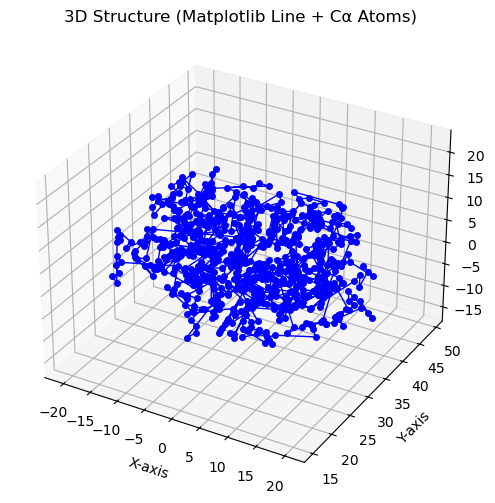

Matplotlib 3D structure visualization completed.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

py3Dmol cartoon visualization displayed.


In [4]:

from Bio import SeqIO
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np

try:
    import py3Dmol
    PY3DMOL_AVAILABLE = True
except ImportError:
    PY3DMOL_AVAILABLE = False
    print("[Warning] py3Dmol not installed. Cartoon visualization will be skipped.")

fasta_file = r"C:\Users\DELL\OneDrive\Desktop\sequence.fasta"  

if os.path.exists(fasta_file):
    record = SeqIO.read(fasta_file, "fasta")

    print("=== FASTA FILE INFORMATION ===")
    print("Protein ID:", record.id)
    print("Description:", record.description)
    print("Sequence:\n", record.seq)
    print("Length of Sequence:", len(record.seq))
    print("\n--------------------------------------\n")
else:
    print(f"[Warning] FASTA file '{fasta_file}' not found. Skipping sequence display.\n")


pdb_file = r"C:\Users\DELL\OneDrive\Desktop\pdb3rgk.ent"  

if not os.path.exists(pdb_file):
    print(f"[Error] Structure file '{pdb_file}' not found.")
else:
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein_structure", pdb_file)

    coords = [atom.coord for atom in structure.get_atoms() if atom.element == 'C']

    if len(coords) == 0:
        print("[Warning] No Cα atom coordinates found in file.")
    else:
        x, y, z = zip(*coords)

        fig = plt.figure(figsize=(7, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x, y, z, marker='o', color='blue', markersize=4, linewidth=1)
        ax.set_title("3D Structure (Matplotlib Line + Cα Atoms)")
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Z-axis")
        plt.show()
        print("Matplotlib 3D structure visualization completed.")

        if PY3DMOL_AVAILABLE:
            with open(pdb_file) as f:
                pdb_data = f.read()

            view = py3Dmol.view(width=700, height=500)
            view.addModel(pdb_data, "pdb")
            view.setStyle({'cartoon': {'color':'spectrum'}}) 
            view.zoomTo()
            view.show()
            print("py3Dmol cartoon visualization displayed.")
        else:
            print("[Info] Install py3Dmol for cartoon-style 3D visualization.")
